IMPORT REQUIRED LIBRARIES

Libraries

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.regularizers import l2


from keras.datasets import fashion_mnist



LOAD DATASET INTO A DATAFRAME

In [82]:
data = pd.read_csv('income_dataset.csv')

DATA PREPROCESSING

In [83]:
data.shape

(32561, 15)

In [84]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

Data Information

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [86]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [87]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [88]:
data.drop(columns='education')

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [89]:
data.describe

<bound method NDFrame.describe of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-marri

In [90]:
missing_vals = data.isnull().sum()
print(missing_vals)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [91]:
data.replace('?',np.nan, inplace=True)

In [92]:
data.head

<bound method NDFrame.head of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90       NaN   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66       NaN  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married  

In [93]:
frequency_counts = data['native.country'].value_counts()
print(frequency_counts)

native.country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

In [94]:
data.drop(columns='native.country')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K


<Axes: >

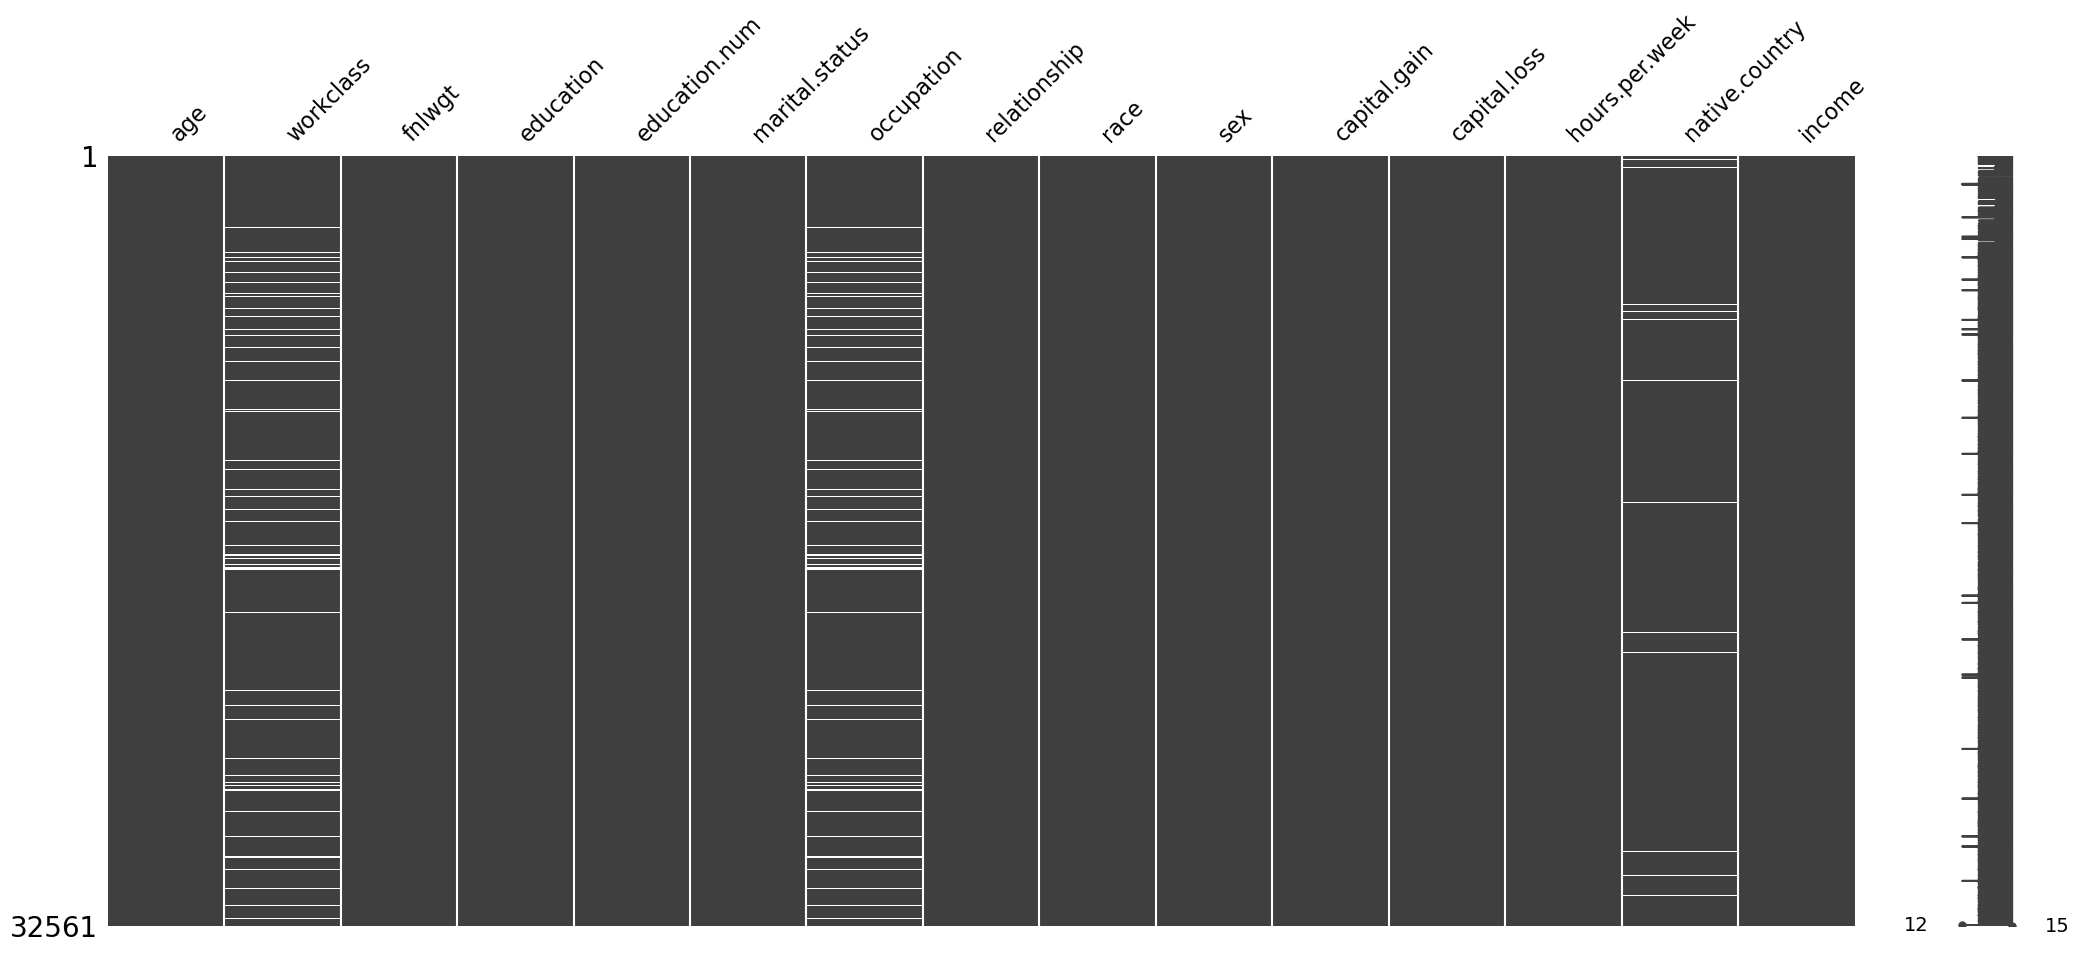

In [95]:
import missingno as msno

msno.matrix(data)

In [96]:
Numerical_feat = data.select_dtypes(include=['int64','float64']).columns
print(list(Numerical_feat))

['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


In [97]:
Categorical_feat = data.select_dtypes(include=['object']).columns
print(list(Categorical_feat))

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


In [98]:
categorical_feat = Categorical_feat.drop('income')
print(list(categorical_feat))


['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


Visualizations

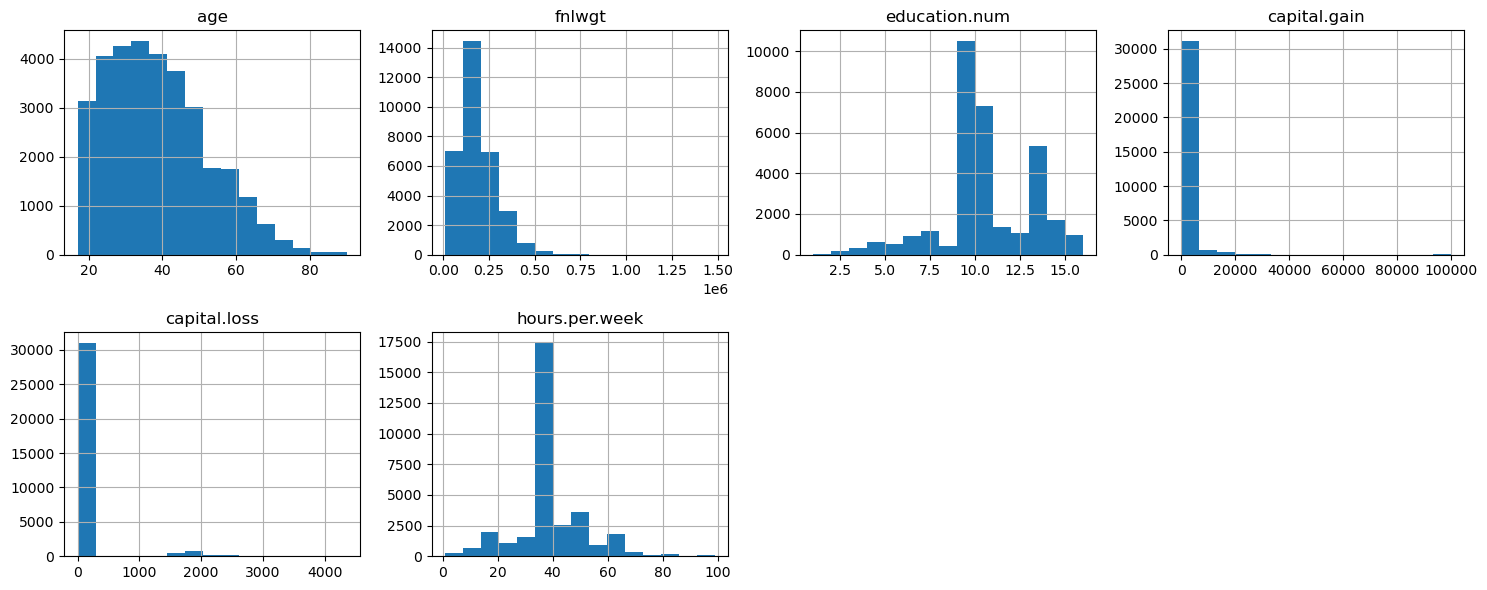

In [99]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features].hist(bins = 15, figsize=(15, 6), layout=(2,4))
plt.tight_layout()
plt.show()

Correlation Coefficiant


target_encoded    1.000000
education.num     0.335154
age               0.234037
hours.per.week    0.229689
capital.gain      0.223329
capital.loss      0.150526
fnlwgt           -0.009463
Name: target_encoded, dtype: float64


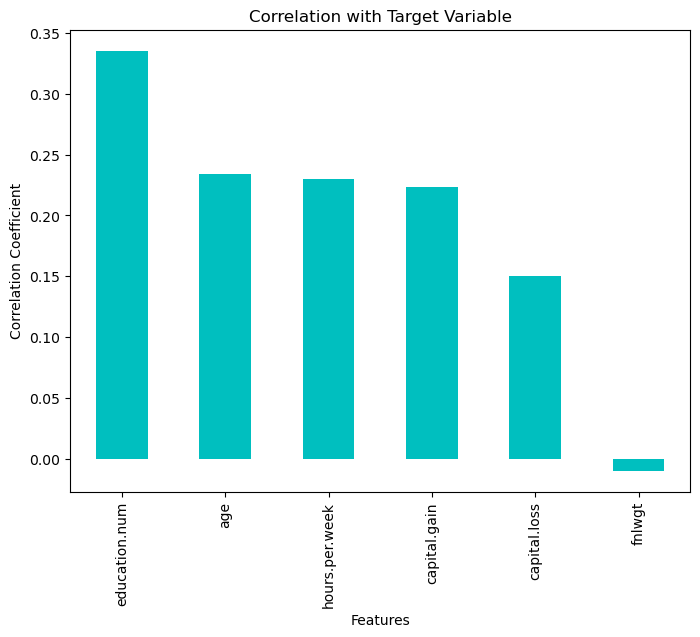

In [100]:
data['target_encoded'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)
data_numeric = data.select_dtypes(include=['int64', 'float64'])

correlation_matrix = data_numeric.corr()

# Focus on correlations with the target variable
target_correlation = correlation_matrix['target_encoded'].sort_values(ascending=False)
print(target_correlation)


plt.figure(figsize=(8, 6))
target_correlation.drop('target_encoded').plot(kind='bar', color='c')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

Box Plot

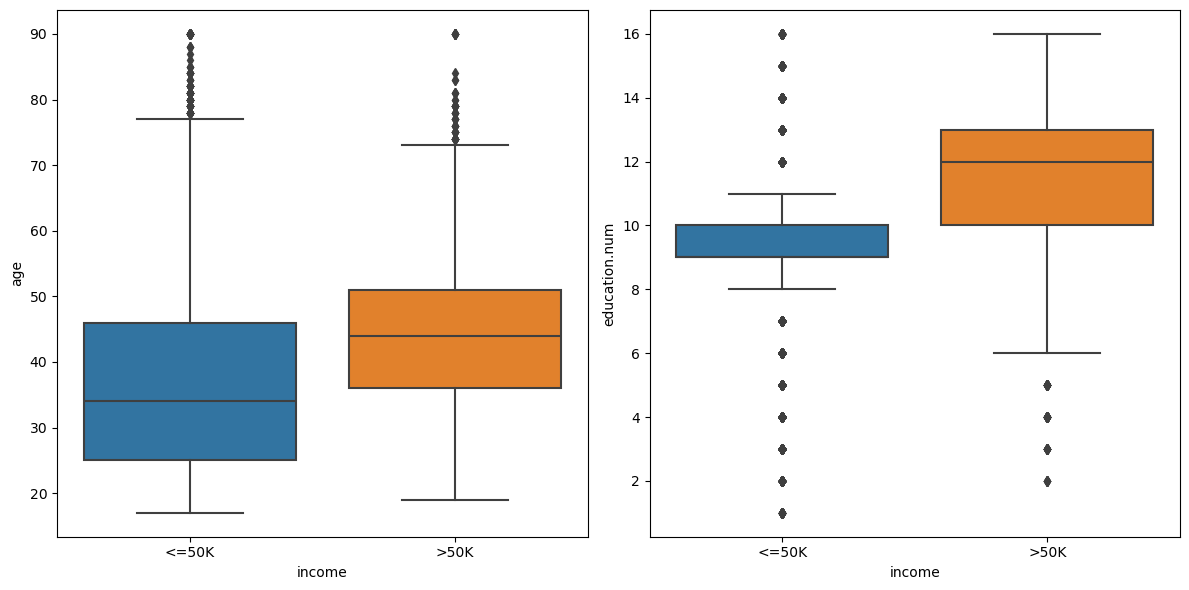

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='income', y='age', data=data, ax=axes[0])
sns.boxplot(x='income', y='education.num', data=data, ax=axes[1])
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


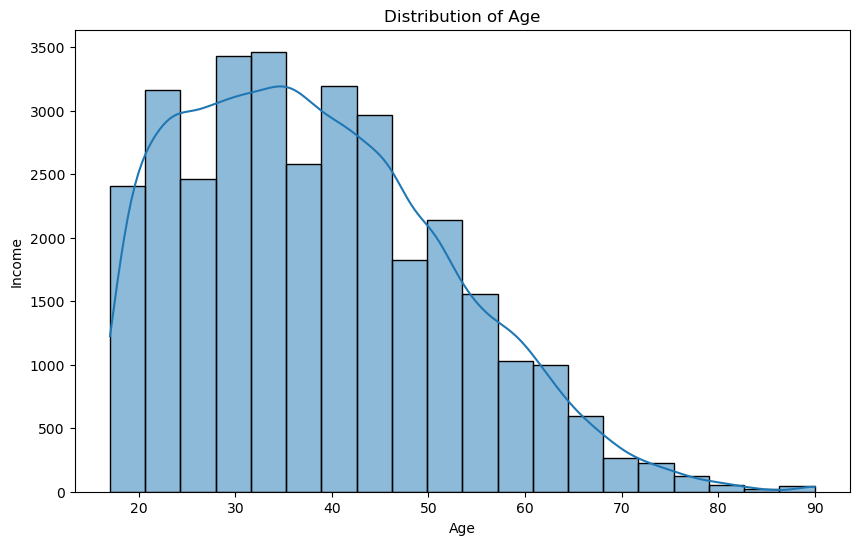

In [102]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [103]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.regularizers import l2

In [104]:
numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent', fill_value='missing'), OneHotEncoder(sparse_output=False))

preprocessor = make_column_transformer(
    (numerical_pipeline, Numerical_feat),
    (categorical_pipeline, categorical_feat)
)

In [105]:
X = data.drop('income', axis=1)

In [106]:
y = np.where(data['income'] == '>50K', 1, 0)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [108]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Bilding a Neural Network

In [109]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
     Dropout(0.3),
    Dense(64, activation='relu'),
     Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy

In [110]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy*100:.4f}%")

Epoch 1/50
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.7832 - loss: 0.8565 - val_accuracy: 0.8570 - val_loss: 0.3756
Epoch 2/50
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8448 - loss: 0.3840 - val_accuracy: 0.8564 - val_loss: 0.3403
Epoch 3/50
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.8540 - loss: 0.3458 - val_accuracy: 0.8585 - val_loss: 0.3316
Epoch 4/50
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8462 - loss: 0.3527 - val_accuracy: 0.8599 - val_loss: 0.3264
Epoch 5/50
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8530 - loss: 0.3374 - val_accuracy: 0.8599 - val_loss: 0.3248
Epoch 6/50
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8529 - loss: 0.3333 - val_accuracy: 0.8553 - val_loss: 0.3277
Epoch 7/50
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8575 - loss: 0.3274 - val_accuracy: 0.8578 - val_loss: 0.3227
Epoch 8/50
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.8522 - loss: 0.3289 - 

Visualizations on the Accuracy

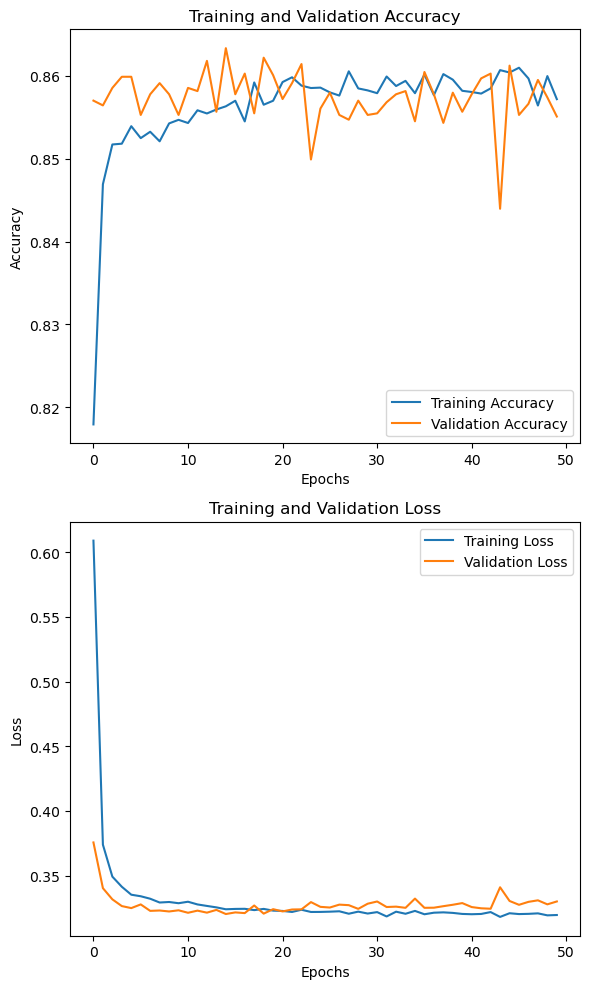

In [111]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(6, 10))

plt.subplot(2, 1, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

PartII- Fashion DataSet

Load the Data Set

In [112]:
np.random.seed(42)
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

Train and Test


In [113]:
train_X = train_X / 255.0
test_X = test_X / 255.0

In [114]:
print(f"Training data shape: {train_X.shape}")
print(f"Testing data shape: {test_X.shape}")
print(f"Training labels shape: {train_y.shape}")
print(f"Testing labels shape: {test_y.shape}")

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Training labels shape: (60000,)
Testing labels shape: (10000,)


Building a convolutional Neural Network

In [115]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(BatchNormalization()),
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization()),
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(250, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(125, activation='relu'))
cnn.add(Dense(60, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

cnn.summary()



/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 250)            │       144,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 125)            │        31,375 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 60)             │         7,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 239,923 (937.20 KB)

 Trainable params: 239,731 (936.45 KB)

 Non-trainable params: 192 (768.00 B)

Building the Accuracy


In [116]:
early_stopping_callbacks = EarlyStopping(monitor='val_loss', patience=3)
checkpoint_callbacks = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
learning_rate_scheduler = LearningRateScheduler(lambda epoch: 1e-3 * (0.9 ** epoch))

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(train_X.reshape(-1, 28, 28, 1), train_y, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping_callbacks, checkpoint_callbacks, learning_rate_scheduler])

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7414 - loss: 0.7032 - val_accuracy: 0.8648 - val_loss: 0.3763 - learning_rate: 0.0010
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8659 - loss: 0.3657 - val_accuracy: 0.8859 - val_loss: 0.3139 - learning_rate: 9.0000e-04
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8827 - loss: 0.3185 - val_accuracy: 0.8950 - val_loss: 0.2856 - learning_rate: 8.1000e-04
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8978 - loss: 0.2812 - val_accuracy: 0.8935 - val_loss: 0.2856 - learning_rate: 7.2900e-04
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9040 - loss: 0.2601 - val_accuracy: 0.8991 - val_loss: 0.2685 - learning_rate: 6.5610e-04
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9095 - loss: 0.2444 - val_accuracy: 0.9101 - val_loss: 0.2522 - learning_rate: 5.9049e-04
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16

In [117]:
test_loss, test_accuracy = cnn.evaluate(test_X.reshape(-1, 28, 28, 1), test_y)
print(f"Test accuracy: {test_accuracy*100:.4f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9179 - loss: 0.2533
Test accuracy: 92.0100%


Best Model Summary

In [118]:
cnn_best_model = tf.keras.models.load_model('best_model.keras')
cnn_best_model.evaluate(test_X.reshape(-1, 28, 28, 1), test_y)
cnn_best_model.summary()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9170 - loss: 0.2537


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 250)            │       144,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 125)            │        31,375 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 60)             │         7,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 719,387 (2.74 MB)

 Trainable params: 239,731 (936.45 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 479,464 (1.83 MB)

Visualization


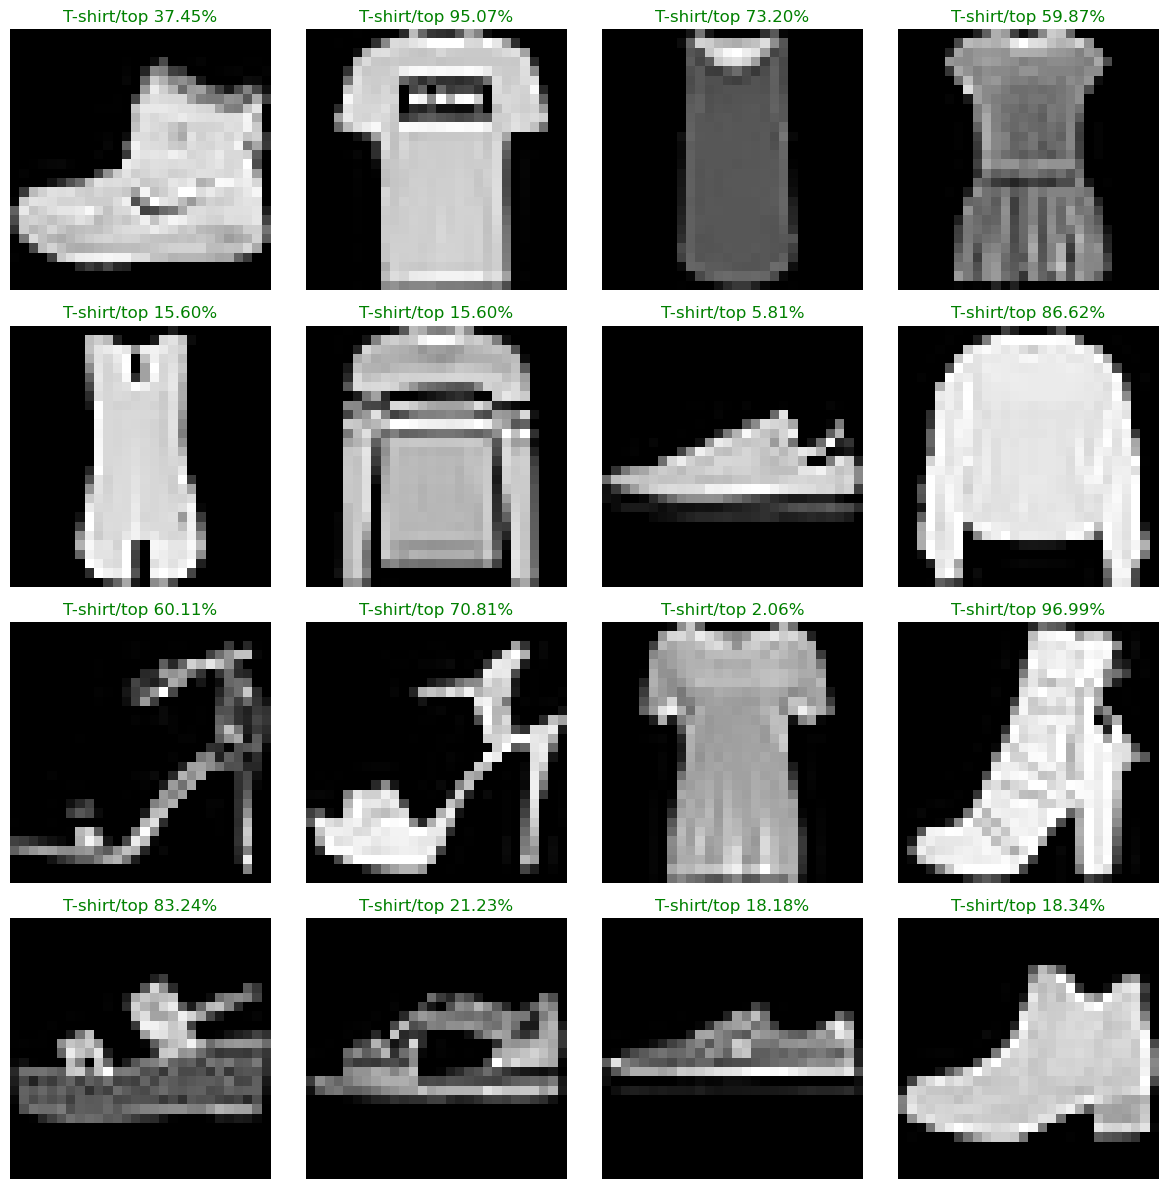

In [119]:
def plot_detailed_samples(images, labels, classes, predictions=None, nrows=4, ncols=4):
    fig, axes = plt.subplots(nrows, ncols, figsize = (12,12))
    axes = axes.flatten()

    for i in range(nrows * ncols):
        if i >= len(images):
            axes[i].axis('off')
            continue
        img = images[i].reshape(28, 28)
        lbl = labels[i]
        ax = axes[i]
        ax.imshow(img, cmap='gray', interpolation='nearest')
        
        
        if predictions is not None:
            predicted_label, confidence = predictions[i]
            title_color = 'green' if np.argmax(lbl) == predicted_label else 'red'
            ax.set_title(f'{classes[predicted_label]} {confidence*100:.2f}%', color=title_color)
        else:
            ax.set_title(classes[np.argmax(lbl)])
        
        ax.axis('off')
        
        
        ax.set_xticks(np.arange(-0.5, 28, 1), minor=True)
        ax.set_yticks(np.arange(-0.5, 28, 1), minor=True)
        ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
        
    plt.tight_layout()
    plt.show()

predictions = [(np.argmax(label), np.random.random()) for label in train_y[:16]] 
plot_detailed_samples(train_X[:16], train_y[:16], class_names, predictions)


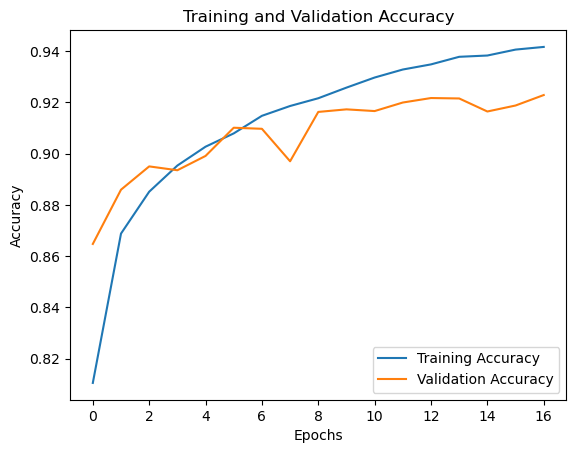

In [120]:
# Plot training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 'lower right')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

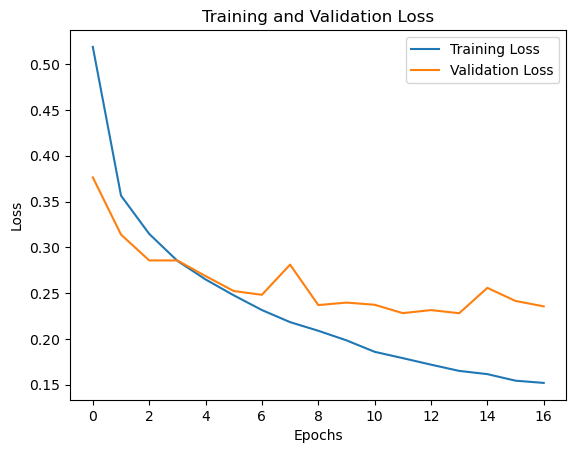

In [121]:
#Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc = 'upper right')
plt.show